In [1]:
import sys
sys.path.append("../")
import pandas as pd
import calculate_model_metrics
import numpy as np
import random
import format_data as fd
import classify_generic as cg
import calculate_model_metrics as CM
from matplotlib import pyplot as plt
import requests

random.seed(123)
np.random.seed(123)

In [2]:
%cd ..

/Users/twood/Desktop/DLBCL-Classifier/src_python


In [3]:
lacy_muts = pd.read_csv('../evaluation_panel_sets/lacy_muts.csv')
lacy_cnvs = pd.read_csv('../evaluation_panel_sets/lacy_cnvs.csv')

In [4]:
lacy_muts

,Patient ID,Effect_1,Effect_2,Gene,p.annot,Chr,Pos,Ref,Alt,PM_Tum,DEPTH
0,P1,Missense,Missense,CARD11,CARD11:p.D357V,7,"2,977,614",T,A,0.28,1234
1,P1,Splice,Essential splice,KMT2D,KMT2D:p.?,12,"49,433,003",A,C,0.41,812
2,P1,Missense,Missense,MPEG1,MPEG1:p.V150I,11,"58,979,891",C,T,0.47,1846
3,P1,Disruptive,Frameshift,TMEM30A,TMEM30A:p.R37fs*43,6,"75,994,240",GCAGCC,G,0.54,334
4,P2,Missense,Missense,TP53,TP53:p.R248Q,17,"7,577,538",C,T,0.46,634
...,...,...,...,...,...,...,...,...,...,...,...
9352,P928,Missense,Missense,SGK1,SGK1:p.E235G,6,"134,494,291",T,C,0.18,1058
9353,P928,Missense,Missense,SGK1,SGK1:p.K247N,6,"134,494,254",C,G,0.16,1041
9354,P928,Missense,Missense,SGK1,SGK1:p.D272E,6,"134,494,179",G,C,0.19,822
9355,P928,Missense,Missense,SGK1,SGK1:p.A304D,6,"134,493,836",G,T,0.24,802


In [5]:
lacy_cnvs

,Pt ID,Gene,Change
0,P1,CDKN2A,del
1,P1,MALT1,amp
2,P1,SETBP1,amp
3,P2,CDKN2A,del
4,P2,PRDM1,del
...,...,...,...
470,P892,PDCD1LG2,amp
471,P894,BCL11A,amp
472,P894,XPO1,amp
473,P906,SGK1,del


In [6]:
lacy_cnv_genes = list(set(lacy_cnvs['Gene']))
lacy_cnv_genes

['SPIB',
 'REL',
 'STAG2',
 'ZFP36L1',
 'FBXW7',
 'ETV6',
 'TP53',
 'ATRX',
 'FAT1',
 'ECT2L',
 'CUX1',
 'POU2F2',
 'PRKCB',
 'KLF2',
 'HLA-A',
 'JAK2',
 'CXCR4',
 'BCOR',
 'WHSC1',
 'SETDB1',
 'CD274',
 'TNFAIP3',
 'CALR',
 'BCL7A',
 'BCL6',
 'SGK1',
 'CCND3',
 'KDM6A',
 'FNDC3A',
 'SPEN',
 'CD79A',
 'SETBP1',
 'CDKN2A',
 'CDK4',
 'NFKBIZ',
 'EGR2',
 'IRF1',
 'IRF8',
 'CARD11',
 'PTPRD',
 'GNA13',
 'MYD88',
 'STAT3',
 'IL7R',
 'HLA-C',
 'CD79B',
 'FAT3',
 'DDX3X',
 'PHF6',
 'FAS',
 'AKAP9',
 'STAT5B',
 'ZRSR2',
 'PIM1',
 'TNFAIP2',
 'TLR2',
 'FGFR3',
 'CYLD',
 'PTPN6',
 'BCL11A',
 'LCK',
 'BIRC3',
 'IKZF1',
 'TMEM30A',
 'RCOR1',
 'MALT1',
 'ARID1A',
 'BCORL1',
 'IRF4',
 'TRAF3',
 'KDM4C',
 'MYC',
 'PTEN',
 'BIRC2',
 'EBF1',
 'TNFRSF14',
 'RB1',
 'CIITA',
 'KMT2A',
 'HLA-B',
 'BCL2',
 'NFKBIA',
 'CD58',
 'POU2AF1',
 'XPO1',
 'GATA3',
 'FBXW10',
 'PRDM1',
 'TP73',
 'PDCD1LG2',
 'GATA1',
 'MLH1']

In [7]:
amp_peaks_table = pd.read_csv('../data_tables/panel_gene_sets/amp_genes.conf_99.txt', sep='\t')
del_peaks_table = pd.read_csv('../data_tables/panel_gene_sets/del_genes.conf_99.txt', sep='\t')

amp_peaks_table

,cytoband,2p16.1,11q23.3,7q22.1,18q21.32,8q24.22,19q13.42,13q31.3,9p24.1,3q28,...,21q22.3,6p21.1,18q22.2,9p13.2,8p23.1,12q12,3p11.1,9q22.33,3q22.1,Unnamed: 23
0,q value,2.5088e-46,1.8171e-07,1.0951e-05,1.2323e-07,4.6143e-05,0.00012197,0.00072655,0.0007476,0.0025093,...,0.031167,0.049344,6.135e-06,0.075289,0.16024,0.15551,0.20527,0.22992,0.20997,NaN
1,residual q value,2.5088e-46,1.8171e-07,1.0951e-05,2.6912e-05,4.6143e-05,0.00012197,0.00072655,0.00097018,0.002834,...,0.031167,0.049344,0.08589,0.11728,0.16024,0.18134,0.20527,0.22992,0.23508,NaN
2,wide peak boundaries,chr2:61021878-61175247,chr11:117403164-117948017,chr7:95864172-105205812,chr18:52604127-59157908,chr8:133879279-134237728,chr19:53770466-58189902,chr13:80122496-115169878,chr9:3932415-5720251,chr3:187003729-189038510,...,chr21:43231151-43338273,chr6:37446241-43416690,chr18:52604127-78077248,chr9:36607621-37489353,chr8:8860628-9623840,chr12:31552647-43771265,chr3:67704969-93755495,chr9:91090093-106860786,chr3:126451993-132172243,NaN
3,genes in wide peak,REL,FXYD2,hsa-mir-548o,hsa-mir-122,SLA,hsa-mir-1274b,hsa-mir-1267,hsa-mir-101-2,hsa-mir-28,...,C2CD2,BYSL,hsa-mir-122,PAX5,hsa-mir-597,ABCD2,hsa-mir-4273,hsa-mir-1302-8,hsa-mir-1280,NaN
4,NaN,PAPOLG,IL10RA,hsa-mir-4285,FECH,TG,hsa-mir-935,hsa-mir-4306,INSL4,BCL6,...,PRDM15,CCND3,BCL2,GRHPR,TNKS,BICD1,hsa-mir-1324,hsa-mir-24-1,ACPP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
gene_to_peaks_amp = {}
gene_to_peaks_del = {}

for col in amp_peaks_table.columns:
    for v in amp_peaks_table[col].values:
        gene_to_peaks_amp[v] = col
        
for col in del_peaks_table.columns:
    for v in del_peaks_table[col].values:
        gene_to_peaks_del[v] = col
    
gene_to_peaks_amp

{'q value': 'cytoband',
 'residual q value': 'cytoband',
 'wide peak boundaries': 'cytoband',
 'genes in wide peak': 'cytoband',
 nan: '3q22.1',
 '2.5088e-46': '2p16.1',
 'chr2:61021878-61175247': '2p16.1',
 'REL': '2p16.1',
 'PAPOLG': '2p16.1',
 'PUS10': '2p16.1',
 'FLJ16341': '2p16.1',
 '1.8171e-07': '11q23.3',
 'chr11:117403164-117948017': '11q23.3',
 'FXYD2': '11q23.3',
 'IL10RA': '11q23.3',
 'FXYD6': '11q23.3',
 'TMPRSS4': '11q23.3',
 'DSCAML1': '11q23.3',
 'TMPRSS13': '11q23.3',
 'LOC100526771': '11q23.3',
 'FXYD6-FXYD2': '11q23.3',
 '1.0951e-05': '7q22.1',
 'chr7:95864172-105205812': '7q22.1',
 'hsa-mir-548o': '7q22.1',
 'hsa-mir-4285': '7q22.1',
 'hsa-mir-106b': '7q22.1',
 'ACHE': '7q22.1',
 'ASNS': '7q22.1',
 'AZGP1': '7q22.1',
 'AP1S1': '7q22.1',
 'CUX1': '7q22.1',
 'CYP3A7': '7q22.1',
 'CYP3A4': '7q22.1',
 'CYP3A5': '7q22.1',
 'DLX5': '7q22.1',
 'DLX6': '7q22.1',
 'EPHB4': '7q22.1',
 'EPO': '7q22.1',
 'GNB2': '7q22.1',
 'AGFG2': '7q22.1',
 'LRCH4': '7q22.1',
 'MCM7': '7q22.1

In [73]:
# # fetch the chromsomal position of each gene from genenames.org
# gene_locations = {}
# url = "https://rest.genenames.org/fetch/symbol/"
# genes_manual_fix = []

# for g in lacy_cnv_genes:
#     response = requests.get(url + g, headers={"Accept": "application/json"})


#     if response.status_code == 200:
#         data = response.json()
#         if data['response']['numFound'] == 0:
#             genes_manual_fix.append(g)
#         else:
#             gene_locations[g] = data['response']['docs'][0]['location']
#     else:
#         print("Error:", response.status_code, response.text)


In [74]:
# genes_manual_fix

In [75]:
# # alias for WHSC1 seems to be NSD2

# requests.get(url + 'NSD2', headers={"Accept": "application/json"}).json()

In [76]:
# # fix WHSC1 manually
# gene_locations['WHSC1'] = '4p16.3'

In [28]:
# len(gene_locations)

92

In [9]:
lacy_cnvs['location'] = -1

for i, row in lacy_cnvs.iterrows():
    curr_peaks = gene_to_peaks_amp
    
    if row['Change'] == 'del':
        curr_peaks = gene_to_peaks_del
        
    if row['Gene'] not in curr_peaks:
        continue
        
    lacy_cnvs.loc[i, 'location'] = curr_peaks[row['Gene']]

In [10]:
our_gsm = pd.read_csv('../data_tables/gsm/DLBCL.699.163drivers.Sep_23_2022.tsv', 
                               sep='\t', index_col=1)
our_gsm_features = our_gsm.index
our_gsm_features

Index(['SV.BCL6', 'DTX1', 'CD70', 'TNFAIP3', 'NOTCH2', 'BCL10', 'B2M', 'CD58',
       'X5Q.AMP', 'FAS',
       ...
       'X6Q14.1.DEL', 'SF3B1', 'ZC3H12A', 'ATP2A2', 'X6P21.33.DEL',
       'X1Q32.1.AMP', 'BCL11A', 'IRF4', 'LYN', 'ETS1'],
      dtype='object', name='classifier_name', length=163)

In [11]:
lacy_muts['Patient ID']

0         P1
1         P1
2         P1
3         P1
4         P2
        ... 
9352    P928
9353    P928
9354    P928
9355    P928
9356    P928
Name: Patient ID, Length: 9357, dtype: object

In [12]:
len(set(lacy_muts['Patient ID'])), len(set(lacy_cnvs['Pt ID']))

(872, 251)

In [13]:
# two patients with no mutations
set(lacy_cnvs['Pt ID']) - set(lacy_muts['Patient ID'])

{'P727', 'P842'}

In [14]:
# 623 patients with no cnvs
len(set(lacy_muts['Patient ID']) - set(lacy_cnvs['Pt ID']))

623

In [15]:
len(set(lacy_muts['Patient ID']).intersection(set(lacy_cnvs['Pt ID'])))

249

In [16]:
# *205R is the L265P mutation apparently
lacy_muts.loc[lacy_muts['Gene'] == 'MYD88']['p.annot'].value_counts()

MYD88:p.*205R    126
MYD88:p.S219C     18
MYD88:p.S251N     13
MYD88:p.M240T      7
MYD88:p.V217F      5
Name: p.annot, dtype: int64

In [17]:
# fill in lacy gsm
lacy_patient_set = sorted(list(set(lacy_muts['Patient ID']).union(set(lacy_cnvs['Pt ID']))), 
                          key=lambda x: int(x[1::]))


lacy_gsm = pd.DataFrame(0, our_gsm_features, columns=lacy_patient_set)
lacy_gsm

,P1,P2,P3,P5,P6,P7,P8,P9,P10,P11,...,P918,P919,P920,P922,P923,P924,P925,P926,P927,P928
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTX1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNFAIP3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOTCH2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BCL11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRF4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
for idx, row in lacy_muts.iterrows():
    gene = row['Gene']
    patient = row['Patient ID']
    
    if gene not in lacy_gsm.index:
        continue
        
    lacy_gsm.loc[gene, patient] = 2
    if gene == 'MYD88':
        if row['p.annot'] == 'MYD88:p.*205R':
            lacy_gsm.loc['MYD88.L265P', patient] = 2
        else:
            lacy_gsm.loc['MYD88.OTHER', patient] = 2
        

In [184]:
# # calculate amp/del level probabilities
# all_cnas = [x for x in our_gsm.index if '.AMP' in x or '.DEL' in x]

# cna_probs = {}

# for cna in all_cnas:
#     numer_1 = sum(our_gsm.loc[cna] == 1)
#     numer_2 = sum(our_gsm.loc[cna] == 2)
#     cna_probs[cna] = [numer_1 / (numer_1 + numer_2),
#                       numer_2 / (numer_1 + numer_2)]

In [185]:
def flip(p):
    return 1 if random.random() < p else 2

In [186]:
random.seed(1)

In [19]:
for idx, row in lacy_cnvs.iterrows():
    gene = row['Gene']
    patient = row['Pt ID']
    change = row['Change'].upper()
    loc = row['location']
    
    if loc == -1:
        continue
        
    gsm_loc = 'X' + loc.upper() + '.' + change
    
    if gsm_loc not in lacy_gsm.index:
        continue
    
    #cna_level = flip(cna_probs[gsm_loc][0])
    lacy_gsm.loc[gsm_loc, patient] = 1


In [20]:
empty_genes = lacy_gsm.index[lacy_gsm.sum(axis=1) == 0]
empty_genes, len(empty_genes)

(Index(['SV.BCL6', 'X5Q.AMP', 'UBE2A', 'ZEB2', 'GNAI2', 'TUBGCP5', 'SMG7',
        'CCDC27', 'FADD', 'TNIP1', 'X17P.DEL', 'X15Q15.3.DEL', 'X6Q.DEL',
        'X11Q.AMP', 'X1P31.1.DEL', 'X4Q21.22.DEL', 'X21Q.AMP', 'X8Q24.22.AMP',
        'X9Q21.13.DEL', 'X2Q22.2.DEL', 'X8Q12.1.DEL', 'X5P.AMP', 'X19P13.2.DEL',
        'X13Q34.DEL', 'X3Q28.DEL', 'X12P.AMP', 'X18Q21.32.AMP', 'X1Q42.12.DEL',
        'X18Q23.DEL', 'X7Q22.1.AMP', 'X3P21.31.DEL', 'X11P.AMP', 'X7P.AMP',
        'X19P13.3.DEL', 'X6P.AMP', 'X17Q24.3.AMP', 'X13Q.AMP', 'X19Q13.32.DEL',
        'X11Q23.3.AMP', 'X7Q.AMP', 'ZNF423', 'X12Q.AMP', 'X1Q.AMP',
        'X17Q25.1.DEL', 'X9Q.AMP', 'SV.BCL2', 'HVCN1', 'SV.MYC', 'MEF2C',
        'EEF1A1', 'DUSP2', 'YY1', 'CRIP1', 'RAC2', 'ACTB', 'SESN3', 'PABPC1',
        'CD274', 'METAP1D', 'X18Q.AMP', 'X3Q.AMP', 'X3P.AMP', 'X18P.AMP',
        'IGLL5', 'X19Q.AMP', 'X19Q13.42.AMP', 'TMSB4X', 'GRHPR', 'HLA.B',
        'HLA.A', 'IRF2BP2', 'OSBPL10', 'TOX', 'HLA.C', 'PIM2', 'ZC3H12A',
        'ATP2

In [34]:
pd.Series(empty_genes).to_csv('../data_tables/panel_gene_sets/lacy_missing_drivers.txt', sep='\t', index=False)

In [31]:
len([x for x in our_gsm.index if '.AMP' in x or '.DEL' in x]), len([x for x in empty_genes if '.AMP' in x or '.DEL' in x])


(61, 42)

In [21]:
len(lacy_gsm.index[lacy_gsm.sum(axis=1) == 0]) / len(lacy_gsm.index)

0.49079754601226994

In [22]:
sum(lacy_gsm.sum(axis=0) == 0), lacy_gsm.shape

(18, (163, 874))

In [23]:
# # we shouldn't classify samples with no events

# lacy_gsm_nonzero = lacy_gsm.loc[:, lacy_gsm.sum(axis=0) != 0]
# lacy_gsm_nonzero.shape

(163, 856)

In [37]:
means = our_gsm.mean(axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [41]:
for g in lacy_gsm.index:
    if g in empty_genes:
        lacy_gsm.loc[g, :] = means.loc[g]

In [42]:
lacy_gsm.loc['SV.MYC'].value_counts()

0.206009    874
Name: SV.MYC, dtype: int64

In [60]:
lacy_gsm

,P1,P2,P3,P5,P6,P7,P8,P9,P10,P11,...,P918,P919,P920,P922,P923,P924,P925,P926,P927,P928
classifier_name,,,,,,,,,,,,,,,,,,,,,
SV.BCL6,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,...,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026,0.618026
DTX1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
CD70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TNFAIP3,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
NOTCH2,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1Q32.1.AMP,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,...,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282
BCL11A,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,...,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282,0.097282
IRF4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
lacy_gsm.to_csv('../data_tables/gsm/lacy_cohort_gsm_cna1s.tsv', sep='\t', index=True)

In [51]:
# Make reduced gsms

reduced_gsm_lacy = fd.construct_reduced_winning_version(lacy_gsm)
classified_samples_lacy = cg.classify_samples_winning_model(reduced_gsm_lacy)
classified_samples_lacy.index.name = 'sample'
classified_samples_lacy['PredictedCluster'] = classified_samples_lacy['PredictedCluster'].map({1.0: 'C1', 
                                                                                                     2.0: 'C2', 
                                                                                                     3.0: 'C3', 
                                                                                                     4.0: 'C4', 
                                                                                                     5.0: 'C5'})
classified_samples_lacy = classified_samples_lacy.sort_values(by='Confidence')
classified_samples_lacy.to_csv('../evaluation_lacy_cohort/lacy_cohort_cna1s_predictions.tsv', sep='\t', index=True)

loaded


../nn.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
../classify_generic.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_df[idx] = average_output


In [64]:
lacy_gsm.loc['SV.BCL2'].value_counts()

0.467811    874
Name: SV.BCL2, dtype: int64

In [66]:
874 * 0.46781

408.86594

In [63]:
lacy_gsm.sum(axis=1).sort_values()

classifier_name
X1Q23.3.AMP       1.000000
X16Q12.1.DEL      1.000000
X1P36.11.DEL      1.000000
X6P21.1.AMP       2.000000
X3Q28.AMP         2.000000
                   ...    
SV.BCL2         408.866953
X18Q.AMP        408.866953
PIM1            466.000000
KMT2D           540.000000
SV.BCL6         540.154506
Length: 163, dtype: float64

In [57]:
classified_samples_lacy

,C1,C2,C3,C4,C5,Confidence,PredictedCluster
sample,,,,,,,
P610,0.210458,0.182974,0.239448,0.148444,0.218677,0.239448,C3
P46,0.210458,0.182974,0.239448,0.148444,0.218677,0.239448,C3
P525,0.210458,0.182974,0.239448,0.148444,0.218677,0.239448,C3
P129,0.210458,0.182974,0.239448,0.148444,0.218677,0.239448,C3
P430,0.210458,0.182974,0.239448,0.148444,0.218677,0.239448,C3
...,...,...,...,...,...,...,...
P40,0.002117,0.003262,0.988869,0.003466,0.002287,0.988869,C3
P303,0.002125,0.002122,0.989049,0.004755,0.001949,0.989049,C3
P442,0.001991,0.001844,0.991514,0.003198,0.001452,0.991514,C3


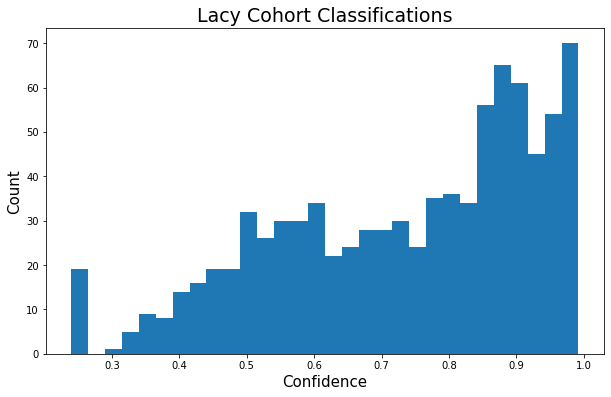

In [58]:
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(classified_samples_lacy['Confidence'], bins=30)
plt.xlabel('Confidence', size=15)
plt.ylabel('Count', size=15)
plt.title('Lacy Cohort Classifications', size=19)
plt.show()

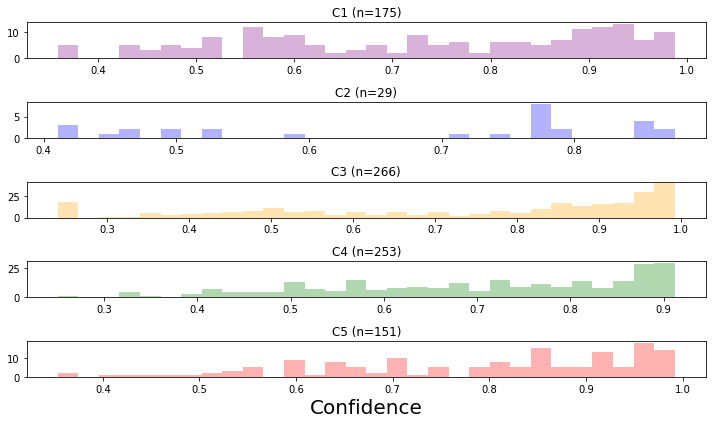

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "sep" which is no longer supported as of 3.3 and will become an error in 3.6


In [69]:
fig, ax = plt.subplots(5,1)
c1_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C1', 'Confidence']
c2_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C2', 'Confidence']
c3_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C3', 'Confidence']
c4_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C4', 'Confidence']
c5_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C5', 'Confidence']


ax[0].hist(c1_df, bins=30, color='purple', alpha=0.3)

ax[1].hist(c2_df, bins=30, color='blue', alpha=0.3)

ax[2].hist(c3_df, bins=30, color='orange', alpha=0.3)

ax[3].hist(c4_df, bins=30, color='green', alpha=0.3)

ax[4].hist(c5_df, bins=30, color='red', alpha=0.3)

ax[0].set_title('C1 (n=' + str(c1_df.shape[0]) + ')')
ax[1].set_title('C2 (n=' + str(c2_df.shape[0]) + ')')
ax[2].set_title('C3 (n=' + str(c3_df.shape[0]) + ')')
ax[3].set_title('C4 (n=' + str(c4_df.shape[0]) + ')')
ax[4].set_title('C5 (n=' + str(c5_df.shape[0]) + ')')
ax[4].set_xlabel('Confidence', size=20)

fig.tight_layout()

plt.show()
fig.savefig('../plots/paper_figures/lacy_cohort_classifications.pdf', sep='\t')

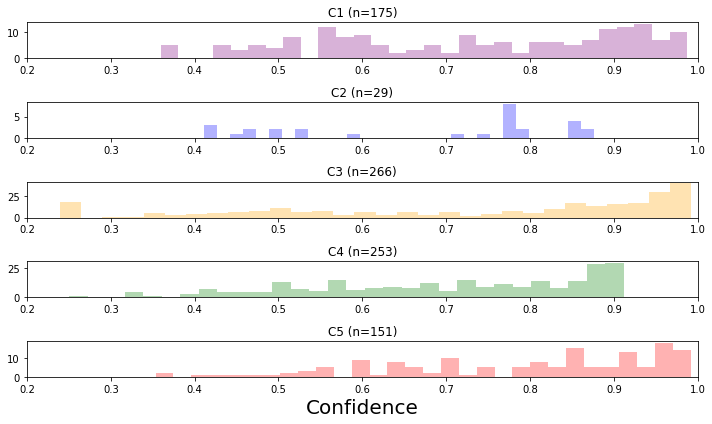

In [77]:
fig, ax = plt.subplots(5,1)
c1_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C1', 'Confidence']
c2_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C2', 'Confidence']
c3_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C3', 'Confidence']
c4_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C4', 'Confidence']
c5_df = classified_samples_lacy.loc[classified_samples_lacy['PredictedCluster'] == 'C5', 'Confidence']


ax[0].hist(c1_df, bins=30, color='purple', alpha=0.3)

ax[1].hist(c2_df, bins=30, color='blue', alpha=0.3)

ax[2].hist(c3_df, bins=30, color='orange', alpha=0.3)

ax[3].hist(c4_df, bins=30, color='green', alpha=0.3)

ax[4].hist(c5_df, bins=30, color='red', alpha=0.3)

ax[0].set_xlim([0.2,1])
ax[1].set_xlim([0.2,1])
ax[2].set_xlim([0.2,1])
ax[3].set_xlim([0.2,1])
ax[4].set_xlim([0.2,1])

ax[0].set_title('C1 (n=' + str(c1_df.shape[0]) + ')')
ax[1].set_title('C2 (n=' + str(c2_df.shape[0]) + ')')
ax[2].set_title('C3 (n=' + str(c3_df.shape[0]) + ')')
ax[3].set_title('C4 (n=' + str(c4_df.shape[0]) + ')')
ax[4].set_title('C5 (n=' + str(c5_df.shape[0]) + ')')
ax[4].set_xlabel('Confidence', size=20)

fig.tight_layout()
plt.savefig('../plots/paper_figures/lacy_confidences.pdf')
plt.show()

In [74]:
means = pd.DataFrame(means)
means.columns = ['mean']
means.to_csv('../data_tables/gsm/mean_values_gsm.tsv', sep='\t')
means

,mean
classifier_name,
SV.BCL6,0.618026
DTX1,0.311874
CD70,0.191702
TNFAIP3,0.267525
NOTCH2,0.154506
...,...
X1Q32.1.AMP,0.097282
BCL11A,0.097282
IRF4,0.123033
